In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

files = ['session_0735651357', 'session_1607878631', 'session_1658051584', 'session_3012944488', 'session_5398005306', 'session_6961018175']
single = []
multiple = [[] for _ in range(3)]

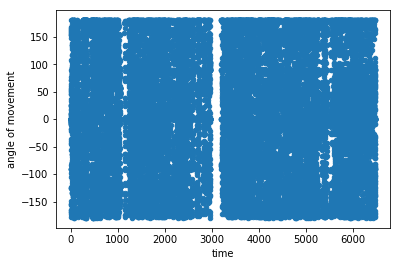

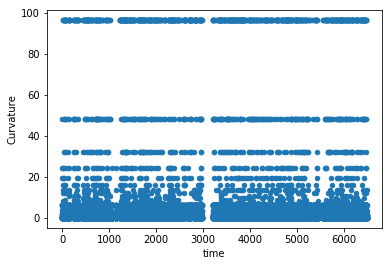

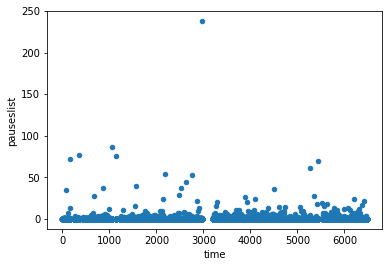

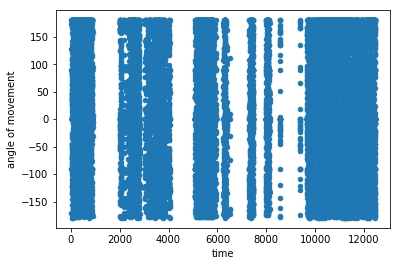

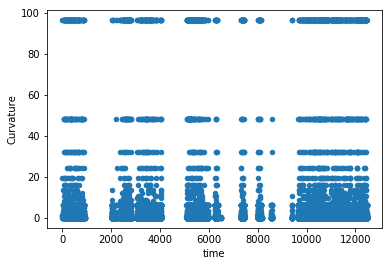

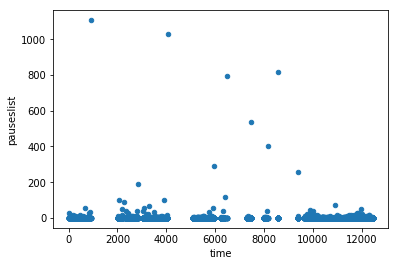

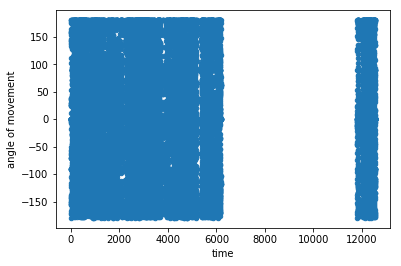

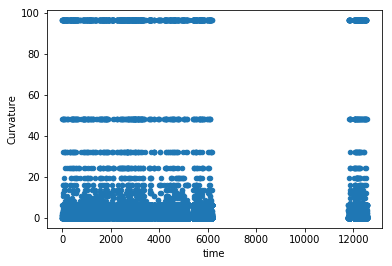

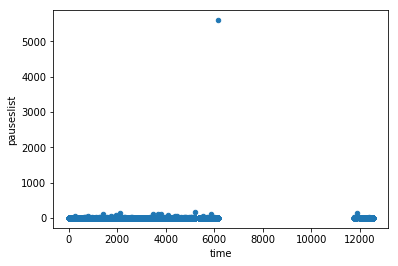

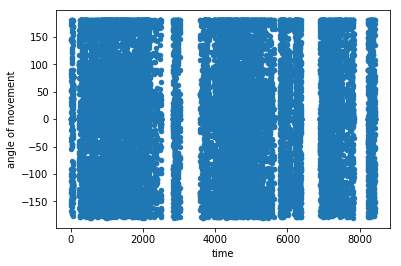

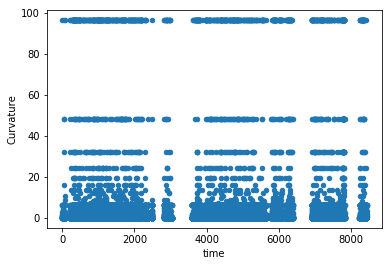

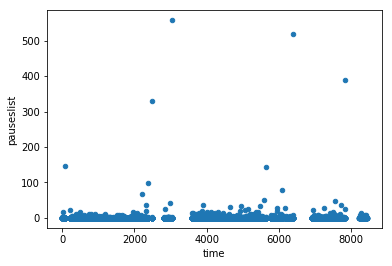

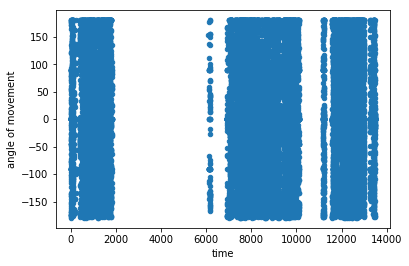

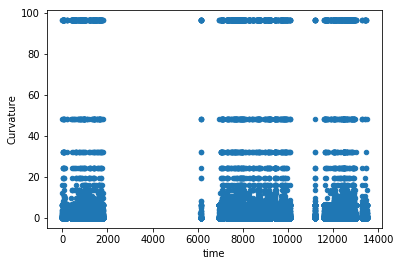

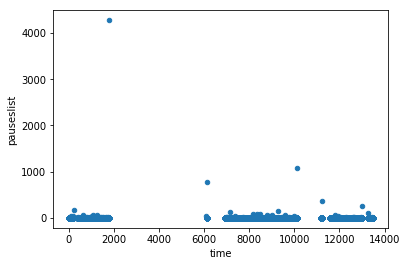

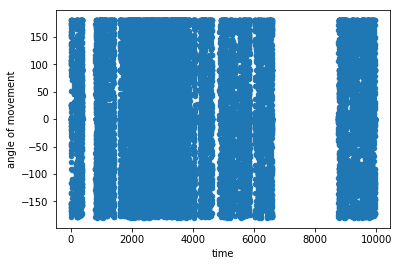

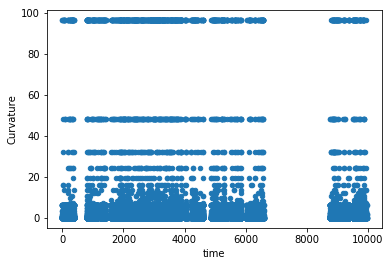

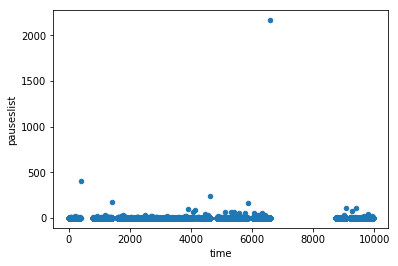

   mean angle of movement  mean_curvature  efficiency  regularity  \
0                0.020046        6.238818    0.000242    0.823211   
1                4.200299        6.595636    0.000803    0.788739   
2                0.060402        6.184883    0.000320    0.689713   
3               -6.310428        5.297483    0.000228    0.702999   
4                2.363219        7.051848    0.000796    0.551368   
5                2.785669        6.080643    0.000821    0.296199   

   Total change in angle  Number of mouse pauses  
0             -12.204106                   20994  
1              57.050226                   21361  
2             -20.956502                   20627  
3             -26.471845                   21072  
4              13.490586                   20025  
5             -67.453309                   21188  
                    0        1        2         3        4        5       \
angle of movement      -90      -90      -45  -84.2894      -90 -56.3099   
curvatu

In [51]:
def time():
    timevec = np.array([])
    for i in range(len(df) - 1):
        time = df.iloc[i]['client timestamp']
        timevec = np.append(timevec, time)
    return timevec

def delta_theta(no_rows):
    summation_deltatheta = 0
    for i in range(no_rows + 1):
        deltax = df.iloc[i + 1]['x'] - df.iloc[i]['x']
        deltay = df.iloc[i + 1]['y'] - df.iloc[i]['y']
        if deltax == 0 and deltay == 0:
            delta_thetavalue = (0 + 2 * np.pi)
            summation_deltatheta += delta_thetavalue
        elif deltax == 0:
            delta_thetavalue = (90 + 2 * np.pi)
            summation_deltatheta += delta_thetavalue
        else:
            delta_thetavalue = (np.arctan(deltay / deltax) + 2 * np.pi)
            summation_deltatheta += delta_thetavalue
    return summation_deltatheta


def angle_of_movement():
    totalanglemovement = np.array([])
    for i in range(len(df) - 1):
        angle_movement = np.arctan2(df.iloc[i + 1]['y'] - df.iloc[i]['y'], df.iloc[i + 1]['x'] - df.iloc[i]['x'])
        totalanglemovement = np.append(totalanglemovement, angle_movement * 180 / np.pi)
    return totalanglemovement


def mean_angle_of_movement(var):
    mean_angle_of_movementvalue = np.mean(var)
    return mean_angle_of_movementvalue


# Curvature


def diff_theta(x1, x2, y1, y2):
    deltax = x2 - x1
    deltay = y2 - y1
    if deltay == 0 and deltax == 0:
        distance = 1
        theta = (0 + 2 * np.pi)
        diff_thetavalue = np.divide(theta, distance)
    elif deltax == 0:
        s = (y2 - y1) ** 2
        distance = np.sqrt(s)
        theta = (90 + 2 * np.pi)
        diff_thetavalue = np.divide(theta, distance)
    else:
        s = (x2 - x1) ** 2 + (y2 - y1) ** 2
        distance = np.sqrt(s)
        theta = np.arctan(deltay / deltax) + 2 * np.pi
        diff_thetavalue = np.divide(theta, distance)
    return diff_thetavalue


def curvature():
    curvaturevec = np.array([])
    for i in range(len(df) - 1):
        a = df.iloc[i + 1]['x']
        b = df.iloc[i]['x']
        c = df.iloc[i + 1]['y']
        d = df.iloc[i]['y']
        curvatureval = diff_theta(a, b, c, d)
        curvaturevec = np.append(curvaturevec, curvatureval)
    return curvaturevec


def mean_curvature(var):
    mean_curvatureval = np.mean(var)
    return mean_curvatureval


# This varies between 0 and 1 where 1 is
# equal to the shortest path between the initial point and final point
# It may be noted that generally humans have poor efficiency and bots have high efficiency and hence
# this may be very useful in differentiating between the two from mouse movements
def efficiency():
    max_x = df.iloc[len(df) - 1]['x']
    max_y = df.iloc[len(df) - 1]['y']
    init_x = df.iloc[0]['x']
    init_y = df.iloc[0]['y']
    sqrx = np.square(max_x - init_x)
    sqry = np.square(max_y - init_y)
    best_dist = np.sqrt(sqrx + sqry)
    sum_of_distances = 0
    for j in range(len(df) - 1):
        sum_of_distances += np.sqrt(np.square(df.iloc[j + 1]['x'] - df.iloc[j]['x'])
                                    + np.square(df.iloc[j + 1]['y'] - df.iloc[j]['y']))

    final_efficiency = np.divide(best_dist, sum_of_distances)
    return final_efficiency


def meandistance():
    tempx = 0
    tempy = 0
    for l in range(len(df)):
        tempx += df.iloc[l]['x']
        tempy += df.iloc[l]['y']
    mean_x = np.divide(tempx, len(df))
    mean_y = np.divide(tempy, len(df))
    meanboth = np.array([mean_x, mean_y])
    return meanboth


def distancefromcentre(meanxy, currentxy):
    return np.sqrt(np.square(currentxy[0] - meanxy[0]) + np.square(currentxy[1] - meanxy[1]))


# Regularity is higher for bots as they might mostly move straight to the target
def regularity():
    tempdistance = 0
    distanceofcentre = meandistance()
    for u in range(len(df)):
        current_point = np.array([df.iloc[u]['x'], df.iloc[u]['y']])
        tempdistance += distancefromcentre(distanceofcentre, current_point)
    meanofthedistances = np.divide(tempdistance, len(df))
    tempdeviation = 0
    for t in range(len(df)):
        current_point = np.array([df.iloc[u]['x'], df.iloc[u]['y']])
        tempdeviation += np.square(distancefromcentre(distanceofcentre, current_point) -
                                   meanofthedistances)
    std_deviation_square = np.divide(tempdeviation, len(df))
    std_deviation = np.sqrt(std_deviation_square)
    finalregularityofcompletepath = np.divide(meanofthedistances, (meanofthedistances + std_deviation))
    return finalregularityofcompletepath


# Denotes the total number of pauses in a session. A poorly designed bot that mimics the mouse
# may be easily caught with the help of this metric
def pauseslist():
    pauses = np.array([])
    for h in range(len(df) - 1):
        timediff = df.iloc[h + 1]['client timestamp'] - df.iloc[h]['client timestamp']
        if timediff > 0.1:  # Here, we use the standard value accepted in HCI for a pause i.e. 0.1
            pauses = np.append(pauses, timediff)
        else:
            pauses = np.append(pauses, 0)
    return pauses


def num_of_pauses(list_of_pauses):
    countpauses = 0
    for h in range(len(list_of_pauses)):
        if list_of_pauses[h] != 0:
            countpauses += 1
    return countpauses


def total_change_in_angle():
    finalangle = np.arctan2(df.iloc[len(df) - 1]['y'], df.iloc[len(df) - 1]['x'])
    firstangle = np.arctan2(df.iloc[0]['y'], df.iloc[0]['x'])
    return (finalangle - firstangle) * 180 / np.pi

features2 = np.empty([3, 0])
for i in range(6):
    sessions = files[i]
    df = pd.read_csv(sessions)
    Featurevector = pd.DataFrame()
    list_of_pauses = pauseslist()
    allangles = angle_of_movement()
    var = curvature()
    features1 = np.array([mean_angle_of_movement(allangles), mean_curvature(var), efficiency(), regularity(),
                          total_change_in_angle(), num_of_pauses(list_of_pauses)])
    features2 = np.hstack((features2,np.array([allangles, var, list_of_pauses], dtype=object)))
    single.insert(i, features1)

    Featurevector['time'] = time()
    Featurevector['angle of movement'] = allangles
    Featurevector['Curvature'] = var
    Featurevector['pauseslist'] = list_of_pauses
    Featurevector['num_of_pauses'] = num_of_pauses(list_of_pauses)

    Featurevector.plot.scatter(x='time', y='angle of movement')
    Featurevector.plot.scatter(x='time', y='Curvature')
    Featurevector.plot.scatter(x='time', y='pauseslist')
    plt.show()


smartyrad = pd.DataFrame(data=single, columns=['mean angle of movement', 'mean_curvature', 'efficiency', 'regularity',
                                               'Total change in angle', 'Number of mouse pauses'])
smarita = pd.DataFrame(data=features2, index=['angle of movement', 'curvature', 'pauseslist'])

print(smartyrad)
print(smarita)